# Retail Price Optimization


### In this lesson, we will do Retail Price Optimization, that is, we will train a model to determine the price

<a href='https://www.kaggle.com/datasets/suddharshan/retail-price-optimization' target=_blank>You can find the data file here</a>

<img src=https://d5q03jzkv9mrr.cloudfront.net/wp-content/uploads/2020/03/Price-optimization.jpg width='400'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('retail_price.csv')

In [3]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
df.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,9750,4.4,57,23,8,1,5,2017,0.649351,12600,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,9750,4.4,61,22,8,1,6,2017,6.493506,12600,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,4.4,123,21,10,1,7,2017,38.311688,12600,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,4.4,90,23,8,1,8,2017,33.766234,12600,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,9750,4.4,54,21,9,1,9,2017,20.779221,12600,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [5]:
df['product_id'].value_counts()

product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6        7
bed5           5
Name: count, dtype: int64

In [6]:
df.shape

(676, 30)

In [7]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [9]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [10]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,21.773669,8.658284,1.494083,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,0.986104,0.705600,0.940430,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,20.000000,8.000000,0.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,21.000000,8.000000,1.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,22.000000,9.000000,1.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,23.000000,9.000000,2.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,23.000000,10.000000,4.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


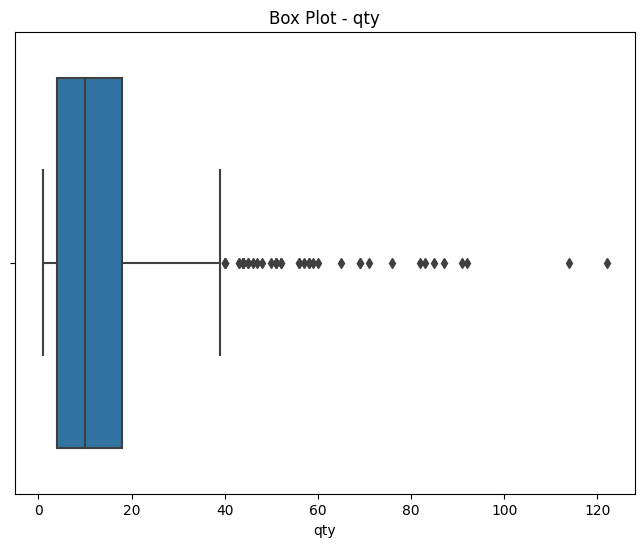

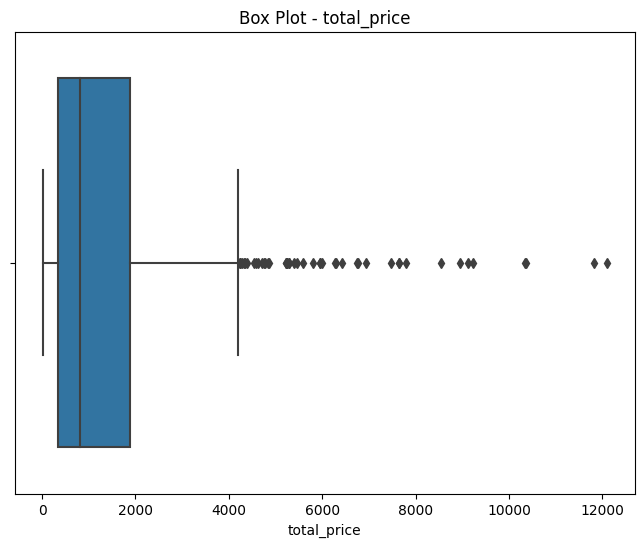

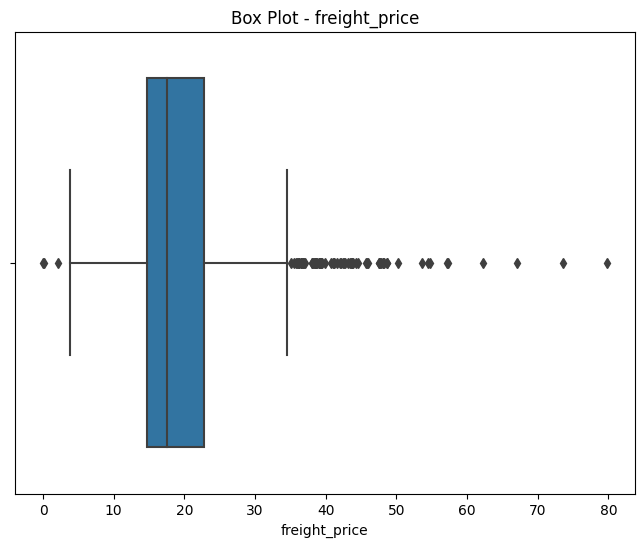

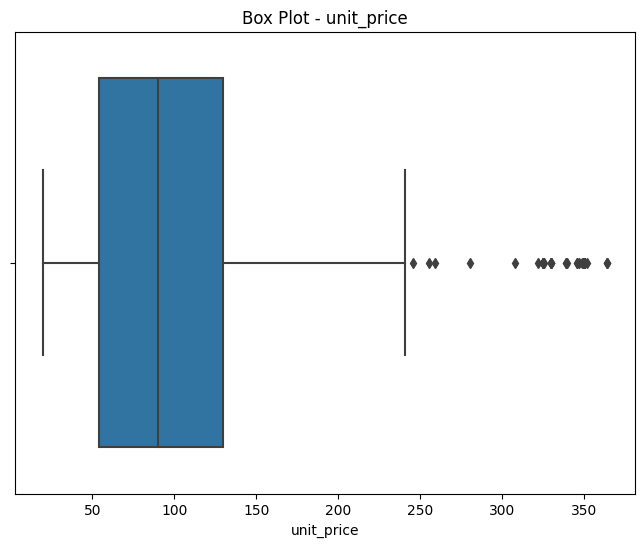

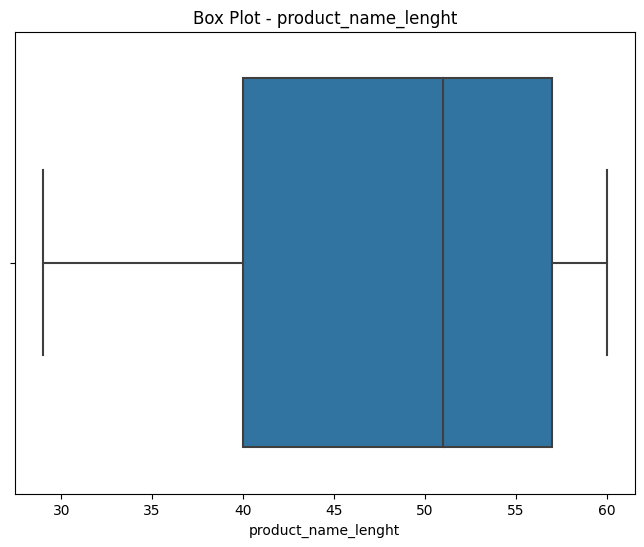

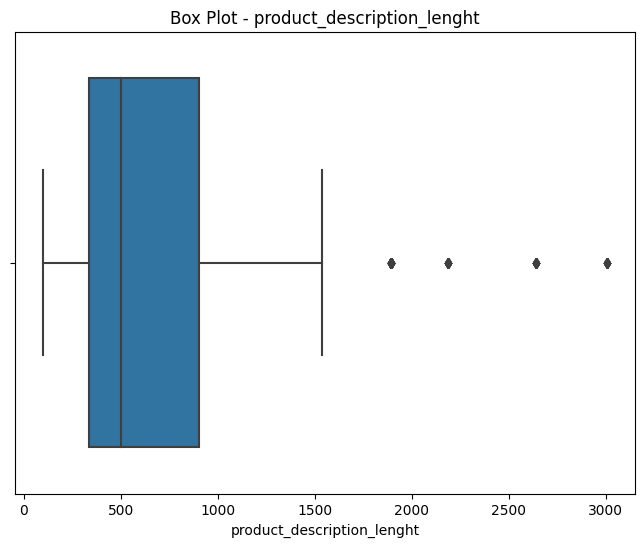

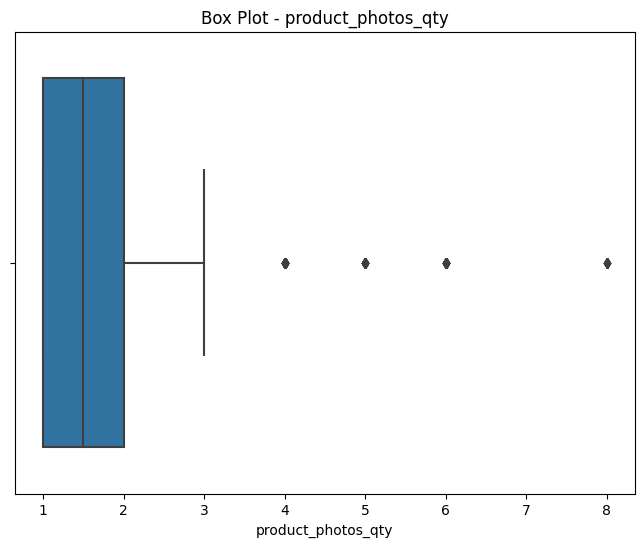

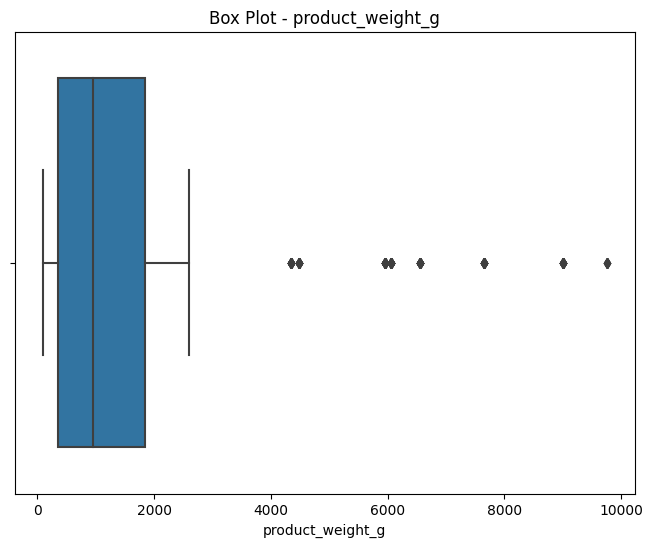

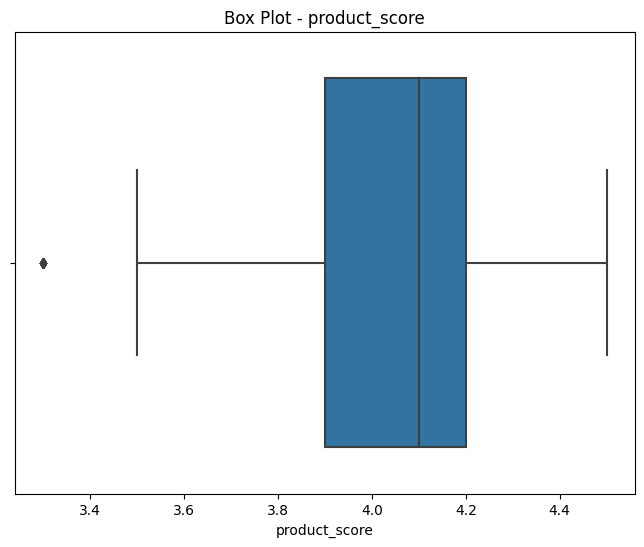

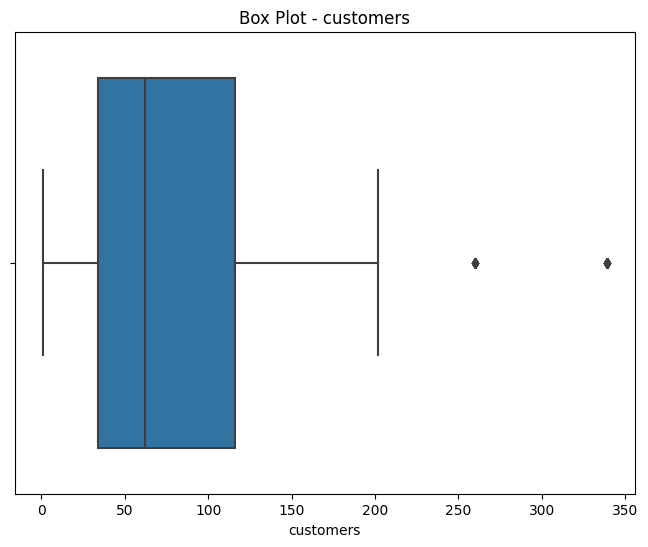

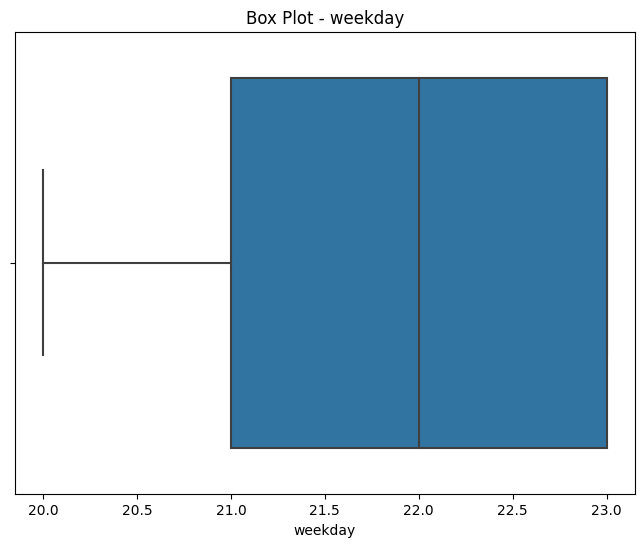

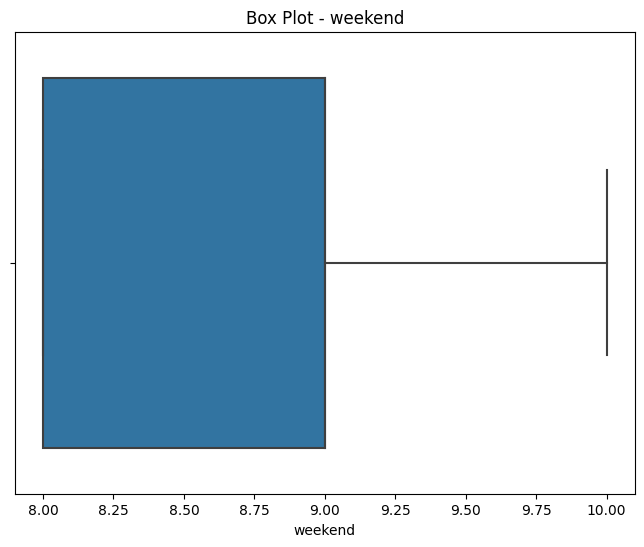

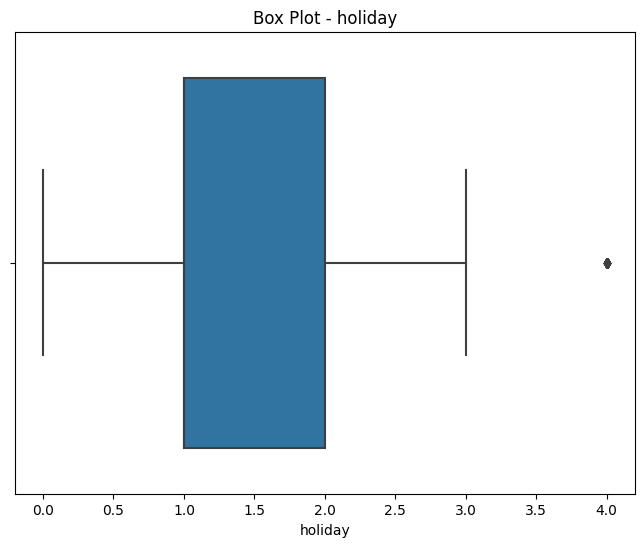

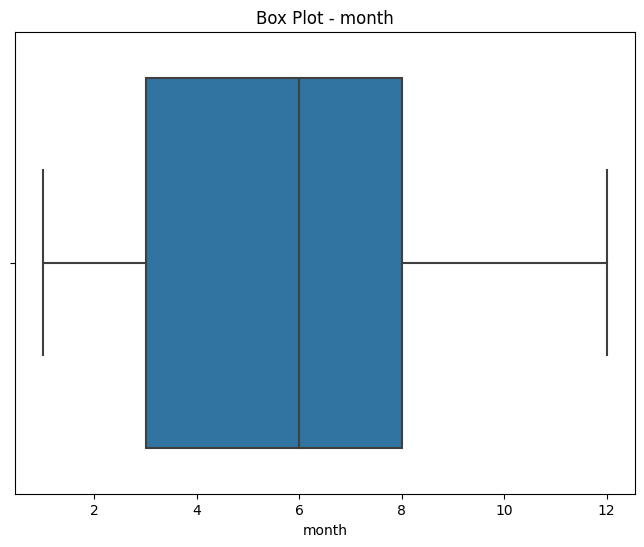

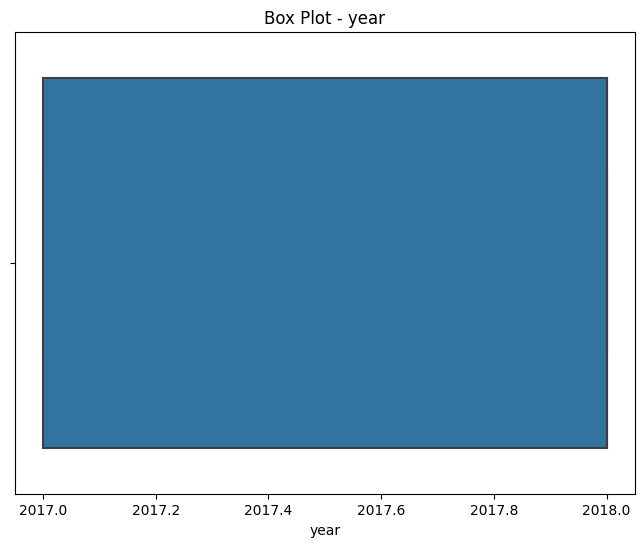

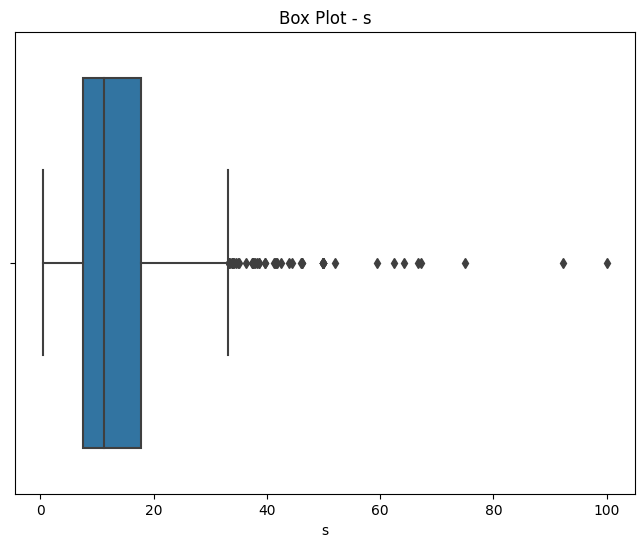

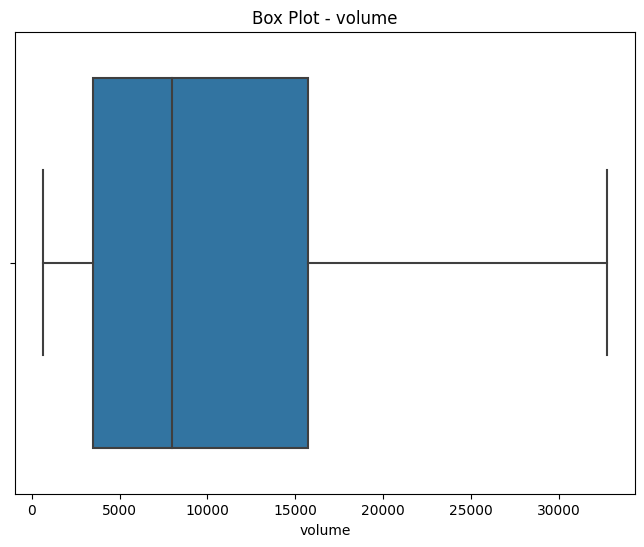

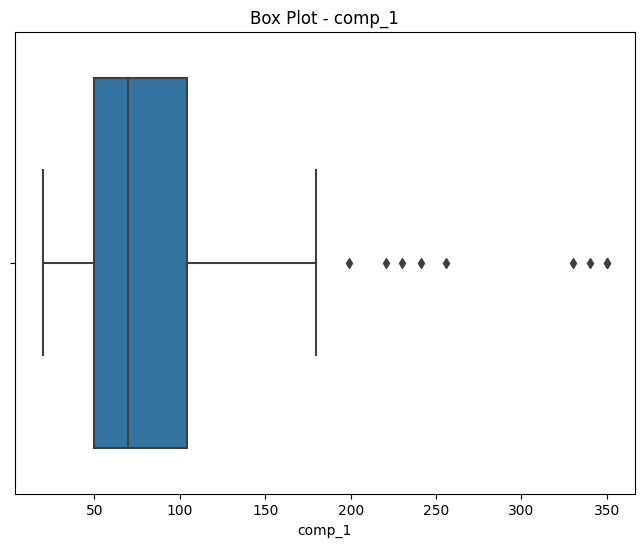

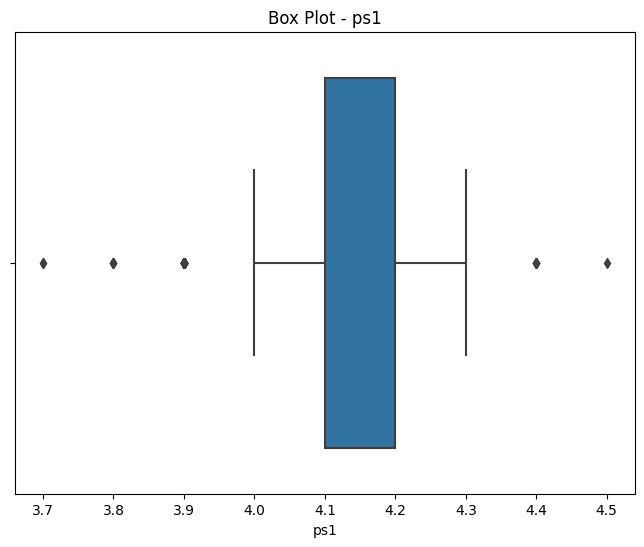

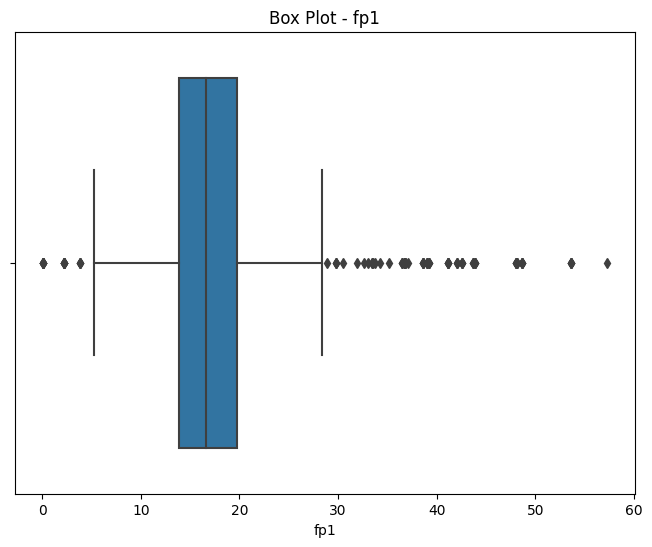

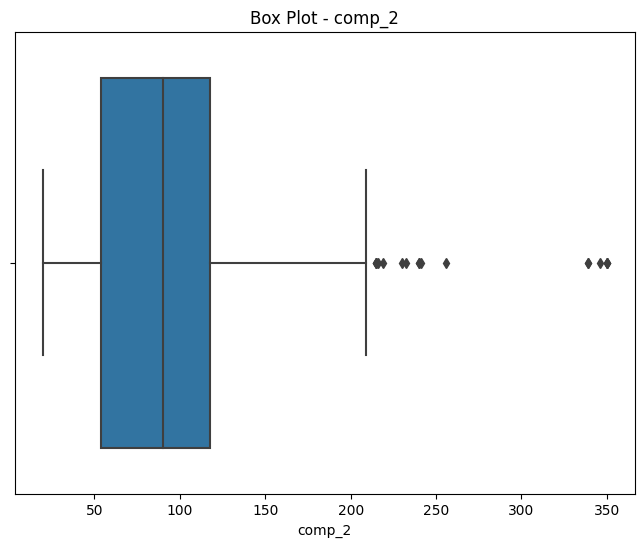

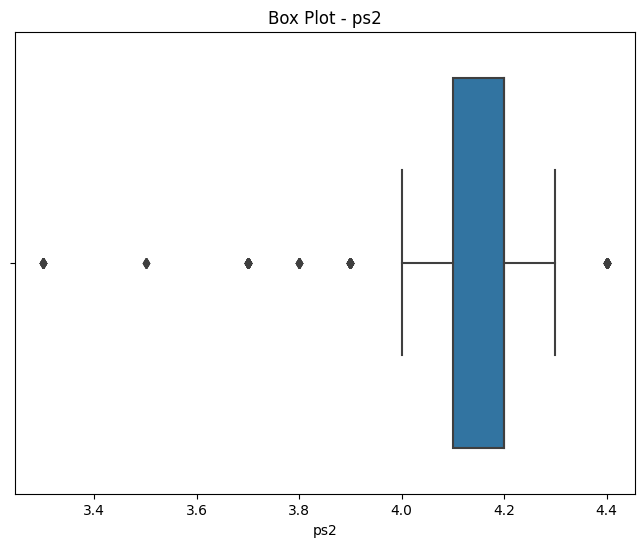

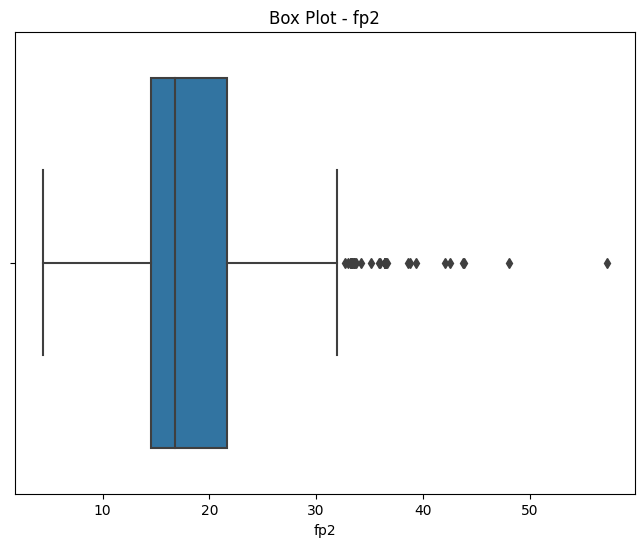

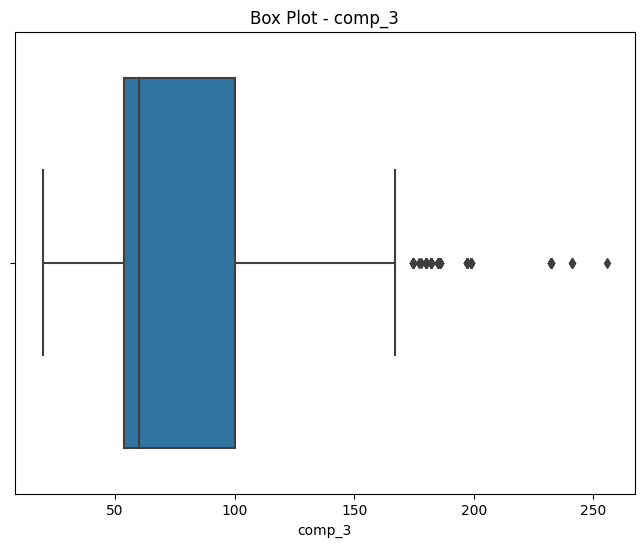

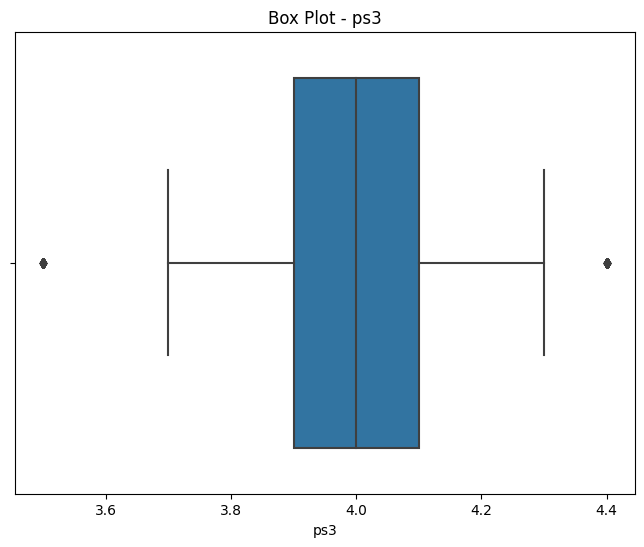

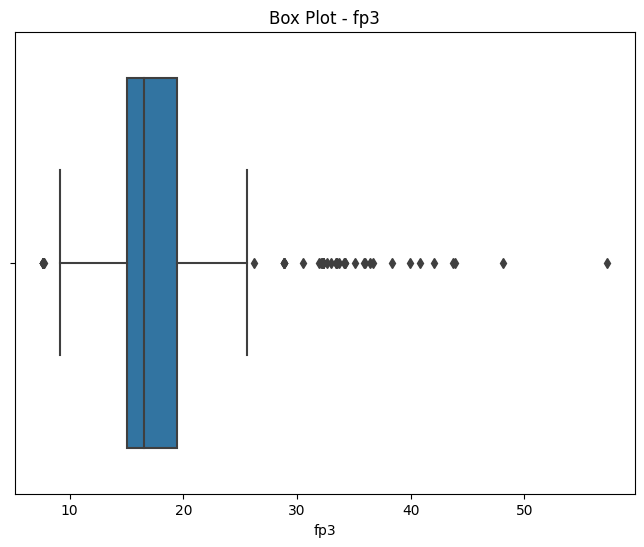

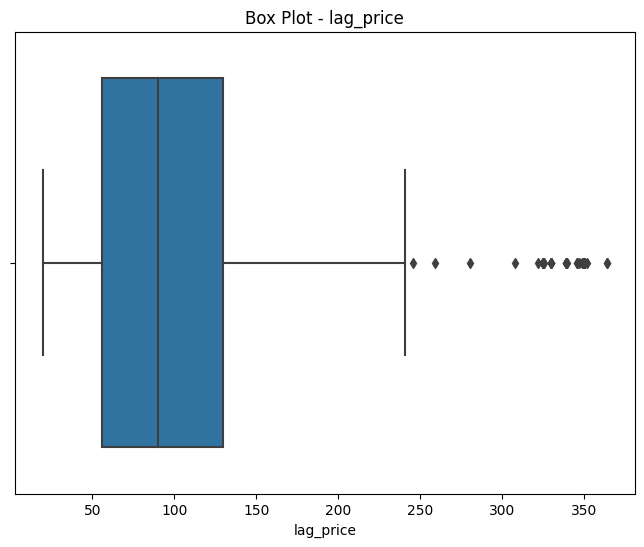

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_outliers(df):
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]: 
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Box Plot - {column}')
            plt.show()

visualize_outliers(df)

In [12]:
x=df[['qty','unit_price','product_photos_qty','product_score','month','year']]

In [13]:
y=df['lag_price']

In [14]:
df['lag_price'].value_counts()

lag_price
59.900000     35
99.990000     29
49.900000     19
349.900000    15
89.990000     15
              ..
148.778571     1
128.191667     1
128.241667     1
117.441290     1
199.509804     1
Name: count, Length: 307, dtype: int64

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [19]:
model=Sequential()
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mse', optimizer='adam')

In [20]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=128,epochs=1500,verbose=1)

Epoch 1/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6268.9194 - val_loss: 5406.4116
Epoch 2/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5713.2305 - val_loss: 5145.2891
Epoch 3/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5184.4404 - val_loss: 5099.6963
Epoch 4/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4780.7217 - val_loss: 4352.6885
Epoch 5/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3924.7236 - val_loss: 4566.5171
Epoch 6/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4363.0522 - val_loss: 3459.9539
Epoch 7/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3550.2463 - val_loss: 2891.2886
Epoch 8/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3019.4290 - val_loss: 2405.0984
Epoch 9/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2043.9741 - val_loss: 1370.6558
Epoch 10/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1294.0089 - val_loss: 640.3057
Epoch 11/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 644.5606 - val_loss: 259.2872
Epoch 12/1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.7368 - val_loss: 65.5122
Epoch 136/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.9618 - val_loss: 66.2690
Epoch 137/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.7690 - val_loss: 67.9024
Epoch 138/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.4684 - val_loss: 66.8894
Epoch 139/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.1767 - val_loss: 97.8873
Epoch 140/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.4081 - val_loss: 83.3373
Epoch 141/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.6201 - val_loss: 80.1332
Epoch 142/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.4383 - val_loss: 95.6946
Epoch 143/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104.6465 - val_loss: 133.7471
Epoch 144/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.8121 - val_loss: 275.3126
Epoch 145/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 179.9725 - val_loss: 144.2629
Epoch 146/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.6026 - val_loss: 70.4348
Epoch 203/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.2401 - val_loss: 101.2901
Epoch 204/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.7634 - val_loss: 67.1565
Epoch 205/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.8806 - val_loss: 66.9770
Epoch 206/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.8204 - val_loss: 62.1271
Epoch 207/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.3331 - val_loss: 62.6987
Epoch 208/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.3901 - val_loss: 63.5909
Epoch 209/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.8317 - val_loss: 68.8471
Epoch 210/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.0883 - val_loss: 114.3125
Epoch 211/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.0136 - val_loss: 107.8432
Epoch 212/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.3367 - val_loss: 80.7473
Epoch 213/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.0151 - val_loss: 130.9986
Epoch 270/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.8869 - val_loss: 120.2786
Epoch 271/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.3439 - val_loss: 103.6517
Epoch 272/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.5845 - val_loss: 78.8475
Epoch 273/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.3945 - val_loss: 66.3441
Epoch 274/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.5165 - val_loss: 75.7739
Epoch 275/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.9002 - val_loss: 76.8438
Epoch 276/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.5181 - val_loss: 98.5319
Epoch 277/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.6075 - val_loss: 145.2395
Epoch 278/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133.4767 - val_loss: 102.3006
Epoch 279/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.3535 - val_loss: 68.9877
Epoch 280/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.3437 - val_loss: 111.7363
Epoch 404/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.5676 - val_loss: 91.1977
Epoch 405/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.1407 - val_loss: 78.4911
Epoch 406/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.4851 - val_loss: 73.4840
Epoch 407/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.2611 - val_loss: 110.3230
Epoch 408/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.8397 - val_loss: 137.1199
Epoch 409/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.7433 - val_loss: 87.4637
Epoch 410/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.3823 - val_loss: 73.7705
Epoch 411/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.0938 - val_loss: 85.0903
Epoch 412/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.9051 - val_loss: 103.5288
Epoch 413/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.5864 - val_loss: 77.5717
Epoch 414/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.2683 - val_loss: 64.1233
Epoch 538/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.4853 - val_loss: 65.1169
Epoch 539/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.9030 - val_loss: 70.8455
Epoch 540/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.9428 - val_loss: 63.8701
Epoch 541/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.6863 - val_loss: 75.4144
Epoch 542/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.1711 - val_loss: 86.0146
Epoch 543/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.0049 - val_loss: 82.7689
Epoch 544/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.9928 - val_loss: 64.4045
Epoch 545/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.0072 - val_loss: 64.3684
Epoch 546/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.4557 - val_loss: 68.9754
Epoch 547/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.4000 - val_loss: 62.7985
Epoch 548/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.8051 - val_loss: 62.8607
Epoch 672/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.0908 - val_loss: 62.7613
Epoch 673/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.2349 - val_loss: 63.3578
Epoch 674/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.7366 - val_loss: 63.0953
Epoch 675/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.3059 - val_loss: 64.2252
Epoch 676/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.8634 - val_loss: 85.8863
Epoch 677/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.1160 - val_loss: 62.4040
Epoch 678/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.3371 - val_loss: 61.2305
Epoch 679/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.5894 - val_loss: 63.4155
Epoch 680/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.0174 - val_loss: 62.0484
Epoch 681/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.4929 - val_loss: 69.6127
Epoch 682/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.9656 - val_loss: 81.6631
Epoch 806/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.5438 - val_loss: 89.2997
Epoch 807/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.4360 - val_loss: 74.0334
Epoch 808/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.3612 - val_loss: 89.7246
Epoch 809/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.7881 - val_loss: 82.5448
Epoch 810/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.8164 - val_loss: 101.8140
Epoch 811/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.6762 - val_loss: 69.4801
Epoch 812/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.4405 - val_loss: 80.0924
Epoch 813/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.1676 - val_loss: 66.4444
Epoch 814/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.5472 - val_loss: 68.4335
Epoch 815/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.3873 - val_loss: 88.8570
Epoch 816/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.8407 - val_loss: 67.5444
Epoch 940/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.5480 - val_loss: 71.3254
Epoch 941/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.3477 - val_loss: 71.0867
Epoch 942/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.3594 - val_loss: 70.0942
Epoch 943/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.9394 - val_loss: 65.4782
Epoch 944/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.3267 - val_loss: 62.6032
Epoch 945/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.7695 - val_loss: 64.3082
Epoch 946/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.1250 - val_loss: 71.5991
Epoch 947/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.6143 - val_loss: 74.7327
Epoch 948/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.0247 - val_loss: 83.7708
Epoch 949/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.8496 - val_loss: 86.6373
Epoch 950/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.6670 - val_loss: 72.7483
Epoch 1073/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.2391 - val_loss: 90.8625
Epoch 1074/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.4909 - val_loss: 87.0894
Epoch 1075/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.8362 - val_loss: 88.4479
Epoch 1076/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.1388 - val_loss: 84.2703
Epoch 1077/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.0577 - val_loss: 68.4164
Epoch 1078/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.3515 - val_loss: 74.6127
Epoch 1079/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.9732 - val_loss: 166.4603
Epoch 1080/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125.9419 - val_loss: 209.1755
Epoch 1081/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184.0521 - val_loss: 114.0908
Epoch 1082/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.4208 - val_loss: 102.0989
Epoch 1083/1500
5/5 ━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.5181 - val_loss: 64.5416
Epoch 1205/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.8355 - val_loss: 65.5851
Epoch 1206/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.2003 - val_loss: 76.2265
Epoch 1207/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.2218 - val_loss: 97.9193
Epoch 1208/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.9029 - val_loss: 83.9166
Epoch 1209/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.9118 - val_loss: 63.6472
Epoch 1210/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.7811 - val_loss: 67.2561
Epoch 1211/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.4815 - val_loss: 79.1683
Epoch 1212/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.5827 - val_loss: 81.6024
Epoch 1213/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.7680 - val_loss: 63.8133
Epoch 1214/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.9978 - val_loss: 68.0526
Epoch 1215/1500
5/5 ━━━━━━━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.1433 - val_loss: 64.7935
Epoch 1337/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.5066 - val_loss: 63.2559
Epoch 1338/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.2615 - val_loss: 64.4521
Epoch 1339/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.2523 - val_loss: 70.1325
Epoch 1340/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.9838 - val_loss: 85.3824
Epoch 1341/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.9435 - val_loss: 84.7633
Epoch 1342/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.9377 - val_loss: 114.6074
Epoch 1343/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.0052 - val_loss: 79.2294
Epoch 1344/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.7432 - val_loss: 123.4876
Epoch 1345/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.0942 - val_loss: 75.8530
Epoch 1346/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.6311 - val_loss: 70.1757
Epoch 1347/1500
5/5 ━━━━━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.7311 - val_loss: 71.5548
Epoch 1469/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.5718 - val_loss: 79.3436
Epoch 1470/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.6188 - val_loss: 68.8892
Epoch 1471/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.7251 - val_loss: 64.2264
Epoch 1472/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.1489 - val_loss: 66.2516
Epoch 1473/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.5188 - val_loss: 69.1355
Epoch 1474/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.6671 - val_loss: 69.0943
Epoch 1475/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.4143 - val_loss: 89.6494
Epoch 1476/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.9458 - val_loss: 67.7231
Epoch 1477/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.3995 - val_loss: 64.7812
Epoch 1478/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.3727 - val_loss: 67.5669
Epoch 1479/1500
5/5 ━━━━━━━━━━━━━━━━━

In [21]:
tahmin=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
r2_score(y_test,tahmin)

0.9889161787022442

In [24]:
mean_squared_error(y_test,tahmin)**.5

7.9210624929102655

In [25]:
model.save('retail.keras')

In [26]:
import matplotlib.pyplot as plt

In [27]:
loss_f=pd.DataFrame(history.history)

<Axes: >

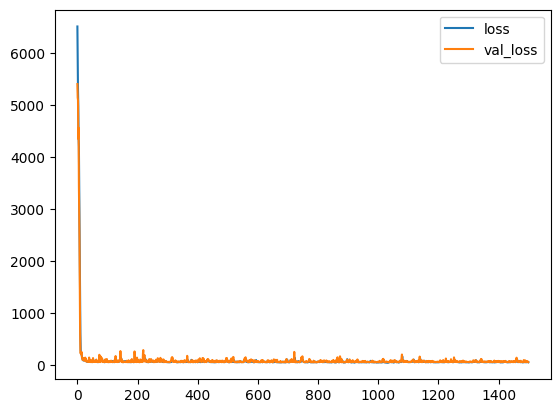

In [28]:
loss_f.plot()

# r2 score is 0.98, business owners can benefit from this model when pricing